In [1]:
!pip install pandas ipython-sql


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import sqlite3

In [6]:
# Load the 'SURVEY' sheet
df = pd.read_excel("survey_2.xlsx", sheet_name="SURVEY")

# View the first few rows
df.head()


,Timestamp,Age,Age Fixed,Age Group,Gender,Gender Cleaned,Country,state,self_employed,family_history,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:43:10,18,18,18–25,Male,Male,Netherlands,NaN,No,No,...,Don't know,Somewhat difficult,Yes,Maybe,No,Some of them,No,No,No,No
1,2014-08-27 12:15:11,18,18,18–25,something kinda male?,Male,Russia,NaN,No,No,...,Yes,Somewhat easy,No,No,Yes,Yes,Yes,Yes,Don't know,No
2,2014-08-27 12:31:43,18,18,18–25,Male,Male,United States,CT,No,No,...,Yes,Very easy,No,No,Some of them,No,No,No,Don't know,No
3,2014-08-27 14:10:15,18,18,18–25,male,Male,United States,TX,No,No,...,Don't know,Don't know,Yes,No,No,No,No,Maybe,Don't know,No
4,2014-08-27 14:11:55,18,18,18–25,Male,Male,United States,WA,No,No,...,Don't know,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No


In [7]:
# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Load the dataframe to a SQL table called 'survey'
df.to_sql('survey', conn, index=False, if_exists='replace')


1251

In [8]:
pd.read_sql_query("SELECT COUNT(*) AS Total_Responses FROM survey", conn)


,Total_Responses
0,1251


In [9]:
pd.read_sql_query("SELECT DISTINCT Country FROM survey", conn)


,Country
0,Netherlands
1,Russia
2,United States
3,Finland
4,United Kingdom
5,Slovenia
6,Canada
7,Australia
8,Switzerland
9,India


In [10]:
pd.read_sql_query("""
SELECT Country, COUNT(*) AS Responses
FROM survey
GROUP BY Country
ORDER BY Responses DESC
LIMIT 10
""", conn)


,Country,Responses
0,United States,746
1,United Kingdom,184
2,Canada,72
3,Germany,45
4,Netherlands,27
5,Ireland,27
6,Australia,21
7,France,13
8,India,10
9,New Zealand,8


In [11]:
pd.read_sql_query("""
SELECT self_employed, COUNT(*) AS Count
FROM survey
GROUP BY self_employed
""", conn)


,self_employed,Count
0,None,18
1,No,1091
2,Yes,142


In [12]:
pd.read_sql_query("""
SELECT family_history, mental_health_consequence, COUNT(*) AS Count
FROM survey
GROUP BY family_history, mental_health_consequence
""", conn)


,family_history,mental_health_consequence,Count
0,No,Maybe,283
1,No,No,322
2,No,Yes,157
3,Yes,Maybe,193
4,Yes,No,165
5,Yes,Yes,131


In [13]:
pd.read_sql_query("""
SELECT supervisor, COUNT(*) AS Count
FROM survey
GROUP BY supervisor
""", conn)


,supervisor,Count
0,No,390
1,Some of them,349
2,Yes,512


In [14]:
pd.read_sql_query("""
SELECT mental_vs_physical, COUNT(*) AS Count
FROM survey
GROUP BY mental_vs_physical
""", conn)


,mental_vs_physical,Count
0,Don't know,574
1,No,338
2,Yes,339


In [15]:
pd.read_sql_query("""
SELECT leave, mental_health_consequence, COUNT(*) AS Count
FROM survey
GROUP BY leave, mental_health_consequence
""", conn)


,leave,mental_health_consequence,Count
0,Don't know,Maybe,261
1,Don't know,No,175
2,Don't know,Yes,125
3,Somewhat difficult,Maybe,37
4,Somewhat difficult,No,35
5,Somewhat difficult,Yes,53
6,Somewhat easy,Maybe,105
7,Somewhat easy,No,126
8,Somewhat easy,Yes,34
9,Very difficult,Maybe,26


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: to show all columns
pd.set_option('display.max_columns', None)


In [18]:
# STEP 1: Import libraries
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 2: Load Excel file
df = pd.read_excel("survey_2.xlsx", sheet_name="SURVEY")
df.head()


,Timestamp,Age,Age Fixed,Age Group,Gender,Gender Cleaned,Country,state,self_employed,family_history,treatment,work_interfere,work_interfere_cleaned,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:43:10,18,18,18–25,Male,Male,Netherlands,NaN,No,No,No,Often,Often,2025-06-01 00:00:00,No,Yes,No,Not sure,No,No,Don't know,Somewhat difficult,Yes,Maybe,No,Some of them,No,No,No,No
1,2014-08-27 12:15:11,18,18,18–25,something kinda male?,Male,Russia,NaN,No,No,No,NaN,NaN,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat easy,No,No,Yes,Yes,Yes,Yes,Don't know,No
2,2014-08-27 12:31:43,18,18,18–25,Male,Male,United States,CT,No,No,Yes,Rarely,Rarely,2025-05-01 00:00:00,Yes,Yes,No,No,No,No,Yes,Very easy,No,No,Some of them,No,No,No,Don't know,No
3,2014-08-27 14:10:15,18,18,18–25,male,Male,United States,TX,No,No,Yes,Sometimes,Sometimes,2025-06-01 00:00:00,No,Yes,Don't know,No,No,Don't know,Don't know,Don't know,Yes,No,No,No,No,Maybe,Don't know,No
4,2014-08-27 14:11:55,18,18,18–25,Male,Male,United States,WA,No,No,No,Never,Never,26-100,No,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No


In [19]:
# STEP 3: Create SQLite connection
conn = sqlite3.connect(':memory:')

# Load dataframe into SQL table
df.to_sql('survey', conn, index=False, if_exists='replace')


1251

In [20]:
# Total responses
pd.read_sql_query("SELECT COUNT(*) AS Total_Responses FROM survey", conn)


,Total_Responses
0,1251


In [21]:
# Top countries
pd.read_sql_query("""
SELECT Country, COUNT(*) AS Responses
FROM survey
GROUP BY Country
ORDER BY Responses DESC
LIMIT 10
""", conn)


,Country,Responses
0,United States,746
1,United Kingdom,184
2,Canada,72
3,Germany,45
4,Netherlands,27
5,Ireland,27
6,Australia,21
7,France,13
8,India,10
9,New Zealand,8


In [22]:
# Basic info
df.info()
df.describe()
df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  1251 non-null   datetime64[ns]
 1   Age                        1251 non-null   int64         
 2   Age Fixed                  1251 non-null   int64         
 3   Age Group                  1251 non-null   object        
 4   Gender                     1251 non-null   object        
 5   Gender Cleaned             1251 non-null   object        
 6   Country                    1251 non-null   object        
 7   state                      738 non-null    object        
 8   self_employed              1233 non-null   object        
 9   family_history             1251 non-null   object        
 10  treatment                  1251 non-null   object        
 11  work_interfere             989 non-null    object        
 12  work_i

state                        513
work_interfere               262
work_interfere_cleaned       262
self_employed                 18
Timestamp                      0
Age                            0
Gender Cleaned                 0
Gender                         0
Age Group                      0
Age Fixed                      0
family_history                 0
Country                        0
treatment                      0
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int

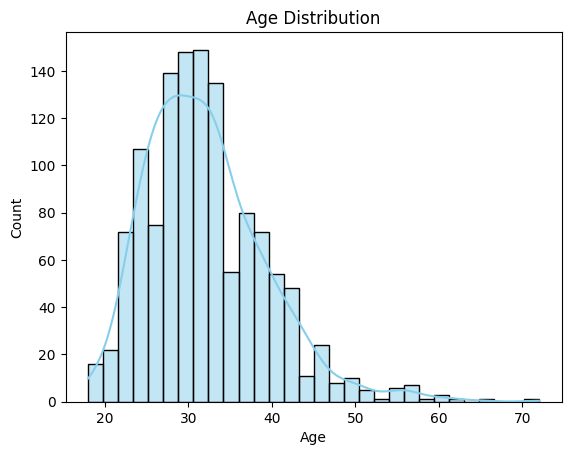

In [23]:
# Age distribution
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.show()


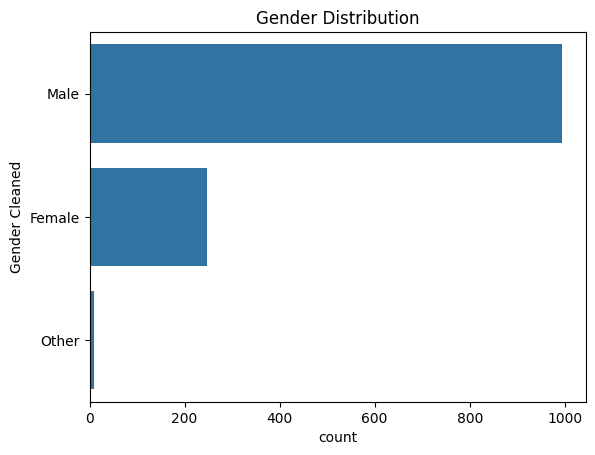

In [24]:
# Gender distribution
sns.countplot(y='Gender Cleaned', data=df)
plt.title("Gender Distribution")
plt.show()


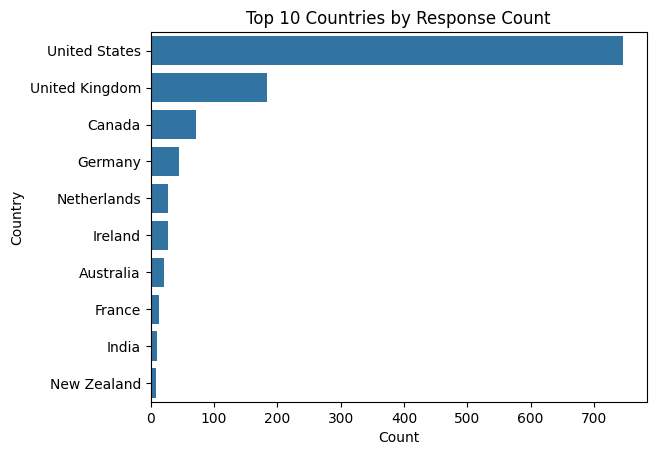

In [25]:
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Response Count")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()


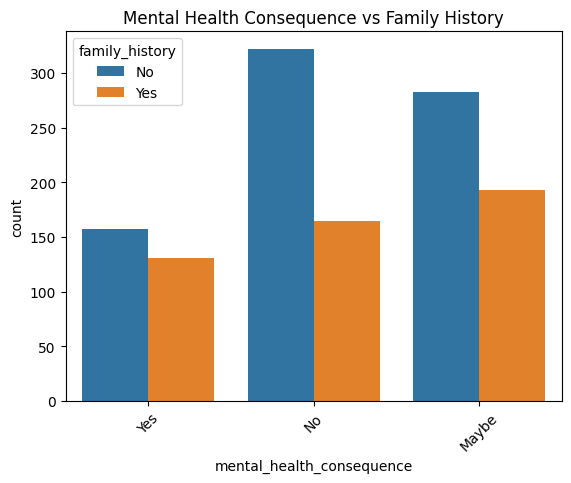

In [26]:
sns.countplot(data=df, x='mental_health_consequence', hue='family_history')
plt.title("Mental Health Consequence vs Family History")
plt.xticks(rotation=45)
plt.show()


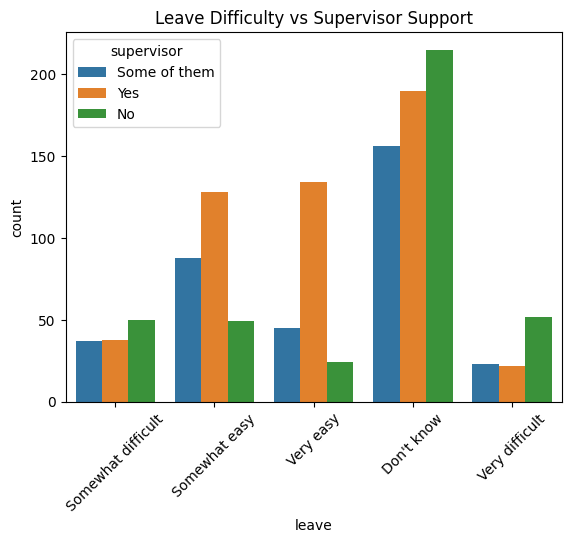

In [27]:
sns.countplot(data=df, x='leave', hue='supervisor')
plt.title("Leave Difficulty vs Supervisor Support")
plt.xticks(rotation=45)
plt.show()


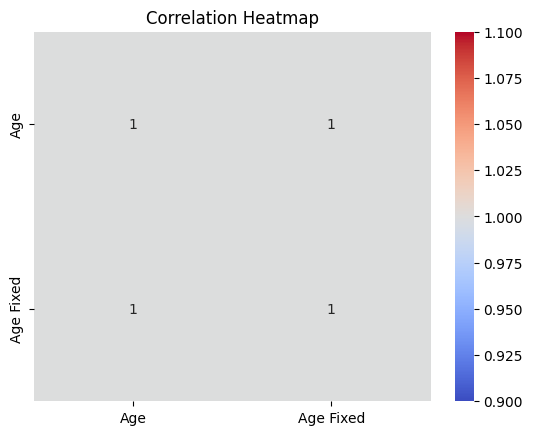

In [28]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
